In [16]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## REYNOLDS

In [17]:
def load(filename: str):
    return pd.read_csv(filename)

In [18]:
huile1_haut = load('../data/huile1_haut.csv')
huile1_bas = load('../data/huile1_bas.csv')
huile2_haut = load('../data/huile2_haut.csv')
huile2_bas = load('../data/huile2_bas.csv')

In [19]:
def sel_dist(arr: np.ndarray, dist: float) -> np.ndarray:
    idx = [0]
    for i, n in enumerate(arr[1:]):
        if abs(n - arr[idx[-1]]) > dist:
            idx.append(i+1)
    return np.array(idx)

In [20]:
def calc_Re(datas, densite):
    v_inf = distance_top_bottom / (unp.uarray(datas['Temps 2 [s]'], delta_t) - unp.uarray(datas['Temps 1 [s]'], delta_t))
    # Equilibre des forces
    # g(m - 4/3 pi r^3 densite_huile) - trainée = 0
    temp = 6 * np.pi * bille_rayon * v_inf
    eta = g * (bille_masse - densite * 4/3 * np.pi * bille_rayon**3) / temp
    Re = densite/eta * v_inf * bille_rayon * 2
    # print(f"Re (min/max/avg): {np.min(Re):.1uP}/{np.max(Re):.1uP}/{np.mean(Re):.1uP}")
    return Re

In [21]:
def plot_and_print(datas, densite, tol=1e-8, color=None, label=None):
    Re = calc_Re(datas, densite)
    T = unp.uarray(datas['Temperature [C]']+273.15, delta_T)

    idx_to_plot = sel_dist(T, tol)
    x = T[idx_to_plot]
    y = Re[idx_to_plot]

    plt.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color, label=label)

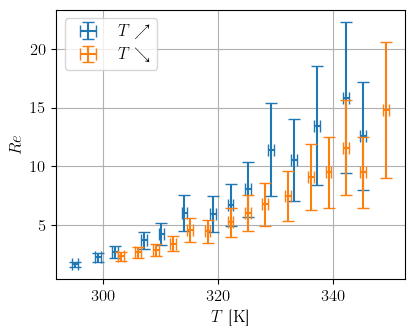

In [22]:
plot_and_print(huile1_haut, densite_1, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print(huile1_bas, densite_1, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Re$')
plt.legend()
plt.grid()
plt.savefig('../figures/huile1_Re.pdf')

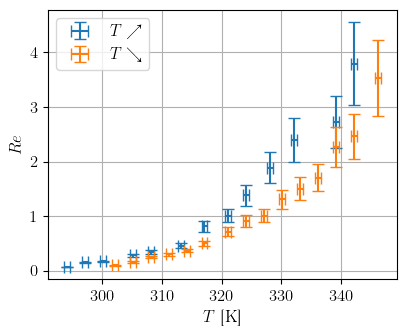

In [24]:
plot_and_print(huile2_haut, densite_2, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print(huile2_bas, densite_2, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$Re$')
plt.legend()
plt.grid()
plt.savefig('../figures/huile2_Re.pdf')